In [1]:
import pandas as pd

# 파일명에 맞춰서 파일 불러오기
file_name = "중증응급질환 구급출동 현황.csv"

# 인코딩 문제 대비해서 예외 처리
try:
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='cp949')

# 데이터 상위 5개 행 미리보기
df.head()


/var/folders/83/vt6wsx6d5_b2kw6k87rzm0n00000gn/T/ipykernel_70372/2664039273.py:8: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, encoding='utf-8')


,relif_reprt_no,reg_cmptn_se_nm,patnt_ocrn_type_se_nm,mjrtrma_nm,hrtarst_nm,crdvsc_crvsscr_se_nm,frstt_nm,ward_nm,lfdau_nm,relif_act_se_nm,...,retrns_resn2,trans_cl_nm,trans_cl_resn,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,20221116509M00001,등록완료,질병,NaN,NaN,심혈관뇌혈관,관악소방서,현장대응단,NaN,특수일반,...,NaN,이송,NaN,-8.5,NaN,1.9,320.0,41.0,NaN,2000.0
1,20221103104M00001,등록완료,질병,NaN,NaN,심혈관뇌혈관,종로소방서,신교119안전센터,NaN,특수일반,...,NaN,이송,NaN,-8.5,NaN,1.9,320.0,41.0,NaN,2000.0
2,20221119508M00002,등록완료,질병외,중증외상,NaN,NaN,구로소방서,현장대응단,NaN,특수일반,...,NaN,이송,NaN,-8.5,NaN,1.9,320.0,41.0,NaN,2000.0
3,20221122103M00001,등록완료,질병외,중증외상,NaN,NaN,중랑소방서,망우119안전센터,NaN,특수일반,...,NaN,이송,NaN,-8.5,NaN,1.9,320.0,41.0,NaN,2000.0
4,20221108104M00001,등록완료,질병,NaN,심정지,NaN,영등포소방서,대림119안전센터,NaN,특수일반,...,NaN,미이송,경찰인계,-8.5,NaN,1.9,320.0,41.0,NaN,2000.0


In [2]:
# 남길 열 목록 (모두 소문자로 처리)
columns_to_keep = [
    'mjrtrma_nm',
    'hrtarst_nm',
    'crdvsc_crvsscr_se_nm',
    'dclr_yr',
    'season_se_nm',
    'dclr_mnth',
    'dclr_day',
    'patnt_age',
    'patnt_sexdstn_se_nm',
    'sigungu_nm',
    'gis_x_axis',
    'gis_y_axis',
    'patnt_occp_nm',
    'acdnt_ocrn_place'
]

# 나머지 열 제거
df = df[columns_to_keep]

# 결과 확인
df.head()


,mjrtrma_nm,hrtarst_nm,crdvsc_crvsscr_se_nm,dclr_yr,season_se_nm,dclr_mnth,dclr_day,patnt_age,patnt_sexdstn_se_nm,sigungu_nm,gis_x_axis,gis_y_axis,patnt_occp_nm,acdnt_ocrn_place
0,NaN,NaN,심혈관뇌혈관,2022,겨울,1,1,21.0,여,관악구,194930.0811,541812.8921,학생,집
1,NaN,NaN,심혈관뇌혈관,2022,겨울,1,1,84.0,여,종로구,196961.4200,554914.1200,무직,집
2,중증외상,NaN,NaN,2022,겨울,1,1,79.0,여,구로구,187328.3400,543398.0800,무직,집
3,중증외상,NaN,NaN,2022,겨울,1,1,38.0,남,중랑구,208639.7269,557034.5460,직장인,도로외교통지역
4,NaN,심정지,NaN,2022,겨울,1,1,88.0,여,구로구,190306.7226,543222.5870,무직,집


In [3]:
df = df.rename(columns={
    'mjrtrma_nm': '중증외상',
    'hrtarst_nm': '심정지',
    'crdvsc_crvsscr_se_nm': '심혈관뇌혈관',
    'dclr_yr': '년도',
    'season_se_nm': '계절',
    'dclr_mnth': '월',
    'dclr_day': '일',
    'patnt_age': '나이',
    'patnt_sexdstn_se_nm': '성별',
    'sigungu_nm': '시군구',
    'gis_x_axis': 'x좌표',
    'gis_y_axis': 'y좌표',
    'patnt_occp_nm': '직업',
    'acdnt_ocrn_place': '사고장소'
})


In [4]:
df.head()

,중증외상,심정지,심혈관뇌혈관,년도,계절,월,일,나이,성별,시군구,x좌표,y좌표,직업,사고장소
0,NaN,NaN,심혈관뇌혈관,2022,겨울,1,1,21.0,여,관악구,194930.0811,541812.8921,학생,집
1,NaN,NaN,심혈관뇌혈관,2022,겨울,1,1,84.0,여,종로구,196961.4200,554914.1200,무직,집
2,중증외상,NaN,NaN,2022,겨울,1,1,79.0,여,구로구,187328.3400,543398.0800,무직,집
3,중증외상,NaN,NaN,2022,겨울,1,1,38.0,남,중랑구,208639.7269,557034.5460,직장인,도로외교통지역
4,NaN,심정지,NaN,2022,겨울,1,1,88.0,여,구로구,190306.7226,543222.5870,무직,집


In [5]:
# 각 열의 데이터 타입 확인
df.dtypes


중증외상       object
심정지        object
심혈관뇌혈관     object
년도          int64
계절         object
월           int64
일           int64
나이        float64
성별         object
시군구        object
x좌표       float64
y좌표       float64
직업         object
사고장소       object
dtype: object

In [6]:
# 각 열의 결측치 개수 확인
df.isnull().sum()


중증외상       83763
심정지       139615
심혈관뇌혈관     84973
년도             0
계절             0
월              0
일              0
나이           813
성별           327
시군구            0
x좌표            4
y좌표            4
직업          1552
사고장소         933
dtype: int64

In [7]:
# object 타입인 열만 골라서 string 타입으로 변환
object_columns = df.select_dtypes(include='object').columns

df[object_columns] = df[object_columns].astype('string')

# 확인
df.dtypes

중증외상      string[python]
심정지       string[python]
심혈관뇌혈관    string[python]
년도                 int64
계절        string[python]
월                  int64
일                  int64
나이               float64
성별        string[python]
시군구       string[python]
x좌표              float64
y좌표              float64
직업        string[python]
사고장소      string[python]
dtype: object

---

직업 / 사고장소 → "기입없음"으로 채우기

x좌표 / y좌표 → 결측치 4건 삭제

성별 → 나머지 성비에 비례해서 무작위로 채우기

나이 → 평균값 반올림 후 정수로 채우기

심정지 → 결측은 "심정지아님"으로 대체

심뇌혈관 / 중증외상 → 그대로 유지

---

In [8]:
import numpy as np

# 1. 직업, 사고장소 결측치 → '기입없음'
df['직업'] = df['직업'].fillna('기입없음')
df['사고장소'] = df['사고장소'].fillna('기입없음')

# 2. x좌표, y좌표 결측치 → 해당 행 삭제
df = df.dropna(subset=['x좌표', 'y좌표'])

# 3. 성별 결측치 → 남녀 비율에 따라 무작위로 채우기
gender_counts = df['성별'].value_counts(normalize=True)  # 비율로 계산
male_ratio = gender_counts.get('남성', 0.5)
female_ratio = gender_counts.get('여성', 0.5)

# 결측치 수만큼 무작위로 남성/여성 할당
missing_gender_count = df['성별'].isna().sum()
random_gender_fill = np.random.choice(['남성', '여성'], size=missing_gender_count, p=[male_ratio, female_ratio])
df.loc[df['성별'].isna(), '성별'] = random_gender_fill

# 4. 나이 → 평균을 반올림해서 정수로 채우기
mean_age = round(df['나이'].mean())
df['나이'] = df['나이'].fillna(mean_age).astype(int)

# 5. 심정지 결측치 → '심정지아님'
df['심정지'] = df['심정지'].fillna('심정지아님')


In [9]:
df.head(30)

,중증외상,심정지,심혈관뇌혈관,년도,계절,월,일,나이,성별,시군구,x좌표,y좌표,직업,사고장소
0,<NA>,심정지아님,심혈관뇌혈관,2022,겨울,1,1,21,여,관악구,194930.0811,541812.8921,학생,집
1,<NA>,심정지아님,심혈관뇌혈관,2022,겨울,1,1,84,여,종로구,196961.4200,554914.1200,무직,집
2,중증외상,심정지아님,<NA>,2022,겨울,1,1,79,여,구로구,187328.3400,543398.0800,무직,집
3,중증외상,심정지아님,<NA>,2022,겨울,1,1,38,남,중랑구,208639.7269,557034.5460,직장인,도로외교통지역
4,<NA>,심정지,<NA>,2022,겨울,1,1,88,여,구로구,190306.7226,543222.5870,무직,집
5,중증외상,심정지아님,<NA>,2022,겨울,1,1,27,남,마포구,192069.6800,551565.4200,학생,도로외교통지역
6,중증외상,심정지아님,<NA>,2022,겨울,1,1,74,남,강서구,187015.1933,552167.6114,자영업,도로
7,<NA>,심정지아님,심혈관뇌혈관,2022,겨울,1,1,78,여,관악구,195830.7700,542912.8400,무직,집
8,<NA>,심정지아님,심혈관뇌혈관,2022,겨울,1,1,57,여,강동구,215786.0021,551118.0098,주부,집
9,중증외상,심정지아님,<NA>,2022,겨울,1,1,30,남,송파구,212275.5100,544522.7400,기타,집


In [10]:
df = df.drop(columns=['중증외상', '심혈관뇌혈관'])


In [11]:
df.head()

,심정지,년도,계절,월,일,나이,성별,시군구,x좌표,y좌표,직업,사고장소
0,심정지아님,2022,겨울,1,1,21,여,관악구,194930.0811,541812.8921,학생,집
1,심정지아님,2022,겨울,1,1,84,여,종로구,196961.4200,554914.1200,무직,집
2,심정지아님,2022,겨울,1,1,79,여,구로구,187328.3400,543398.0800,무직,집
3,심정지아님,2022,겨울,1,1,38,남,중랑구,208639.7269,557034.5460,직장인,도로외교통지역
4,심정지,2022,겨울,1,1,88,여,구로구,190306.7226,543222.5870,무직,집


In [12]:
df = df.drop(columns=['계절'])

In [13]:
df.head()

,심정지,년도,월,일,나이,성별,시군구,x좌표,y좌표,직업,사고장소
0,심정지아님,2022,1,1,21,여,관악구,194930.0811,541812.8921,학생,집
1,심정지아님,2022,1,1,84,여,종로구,196961.4200,554914.1200,무직,집
2,심정지아님,2022,1,1,79,여,구로구,187328.3400,543398.0800,무직,집
3,심정지아님,2022,1,1,38,남,중랑구,208639.7269,557034.5460,직장인,도로외교통지역
4,심정지,2022,1,1,88,여,구로구,190306.7226,543222.5870,무직,집


In [15]:
# 심정지인 행 개수
심정지_건수 = (df['심정지'] == '심정지').sum()

# 심정지아님인 행 개수
비심정지_건수 = (df['심정지'] == '심정지아님').sum()

# 출력
print(f"심정지인 행의 개수: {심정지_건수}")
print(f"심정지가 아닌 행의 개수: {비심정지_건수}")


심정지인 행의 개수: 14886
심정지가 아닌 행의 개수: 139611


In [18]:
df['성별'] = df['성별'].replace({'남성': '남', '여성': '여'})


In [19]:
# '심정지'인 행만 필터링
target_df = df[df['심정지'] == '심정지']


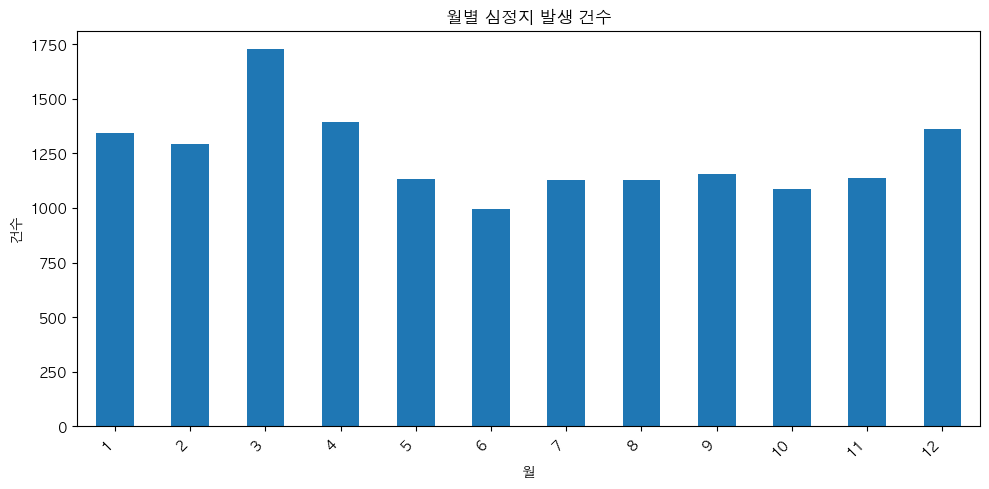

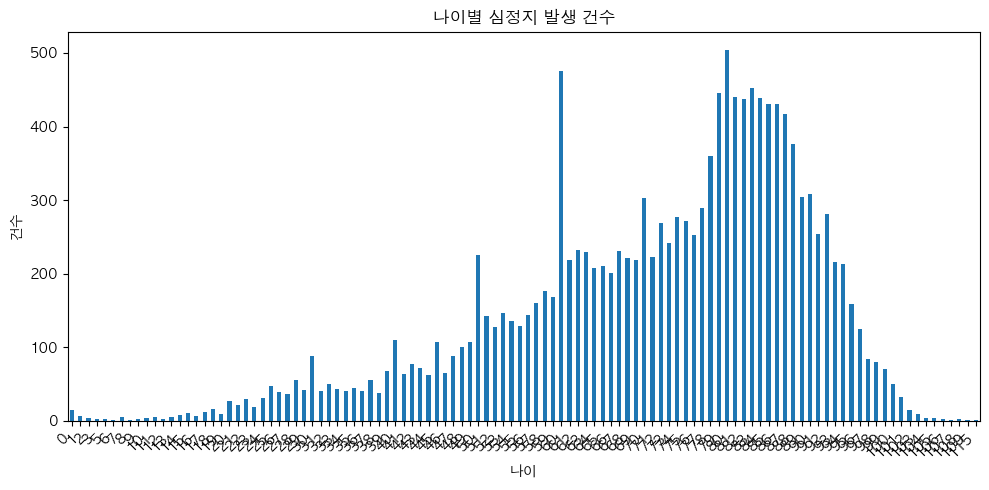

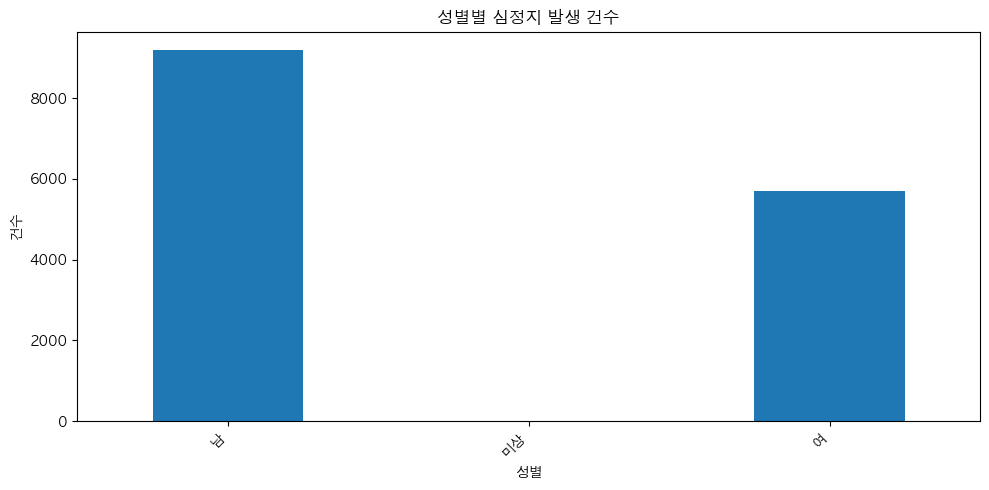

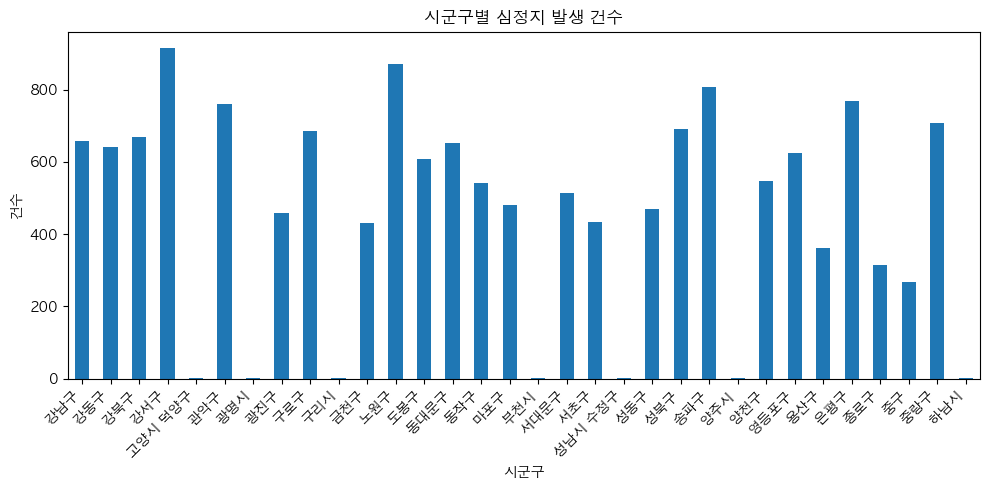

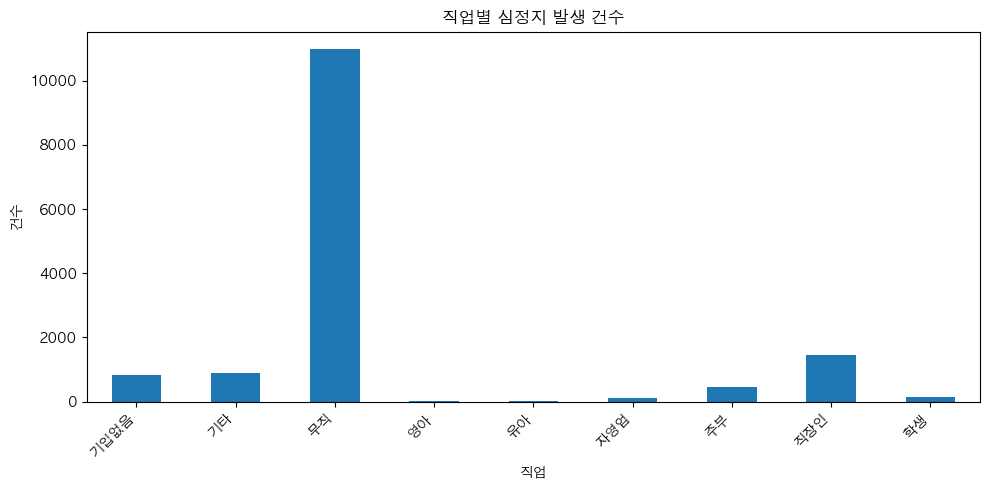

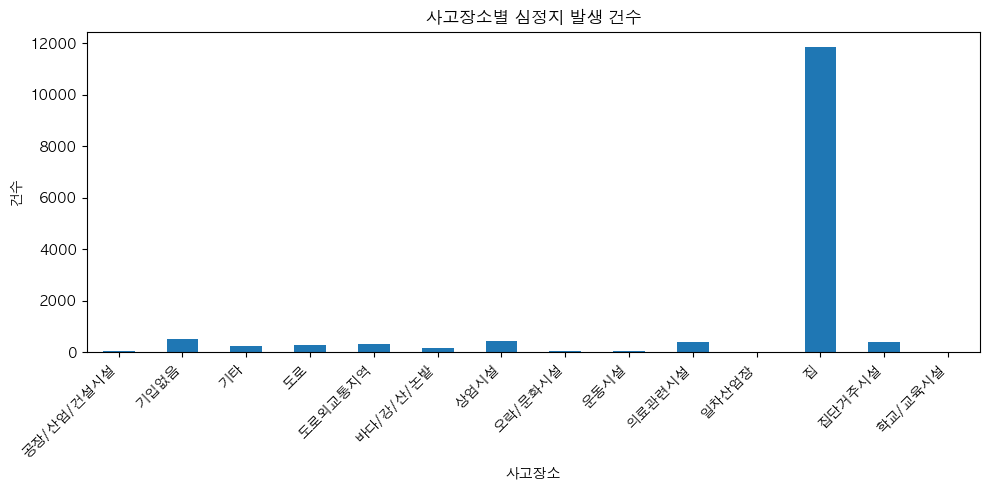

In [24]:
import matplotlib.pyplot as plt

# 그래프 한글 폰트 설정 (맥북 기본 폰트)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화할 열 목록
columns_to_plot = ['월', '나이', '성별', '시군구', '직업', '사고장소']

# 그래프 그리기
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    target_df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{col}별 심정지 발생 건수')
    plt.xlabel(col)
    plt.ylabel('건수')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


사고장소는 집이 대부분.

직업은 무직이 대부분.

시군구는 서울시 통계이기때문에 경기도 지역은 미비하다.

성별은 남성이 더 많다.

월은 3월이 많지만 대체적으로 비슷한 경향.

나이는 많을수록 늘어난다.

In [21]:
미상_성별_건수 = (df['성별'] == '미상').sum()
print(f"'미상'으로 표시된 성별 행의 개수: {미상_성별_건수}")


'미상'으로 표시된 성별 행의 개수: 1


In [23]:
df = df[df['성별'] != '미상']
# 미상으로 표시된 행 1개는 drop

In [25]:
# 제거할 시군구 목록
drop_regions = ['하남시', '양주시', '성남시 수정구', '부천시', '구리시', '광명시', '고양시 덕양구']

# 해당 지역이 아닌 행만 남기기
df = df[~df['시군구'].isin(drop_regions)]


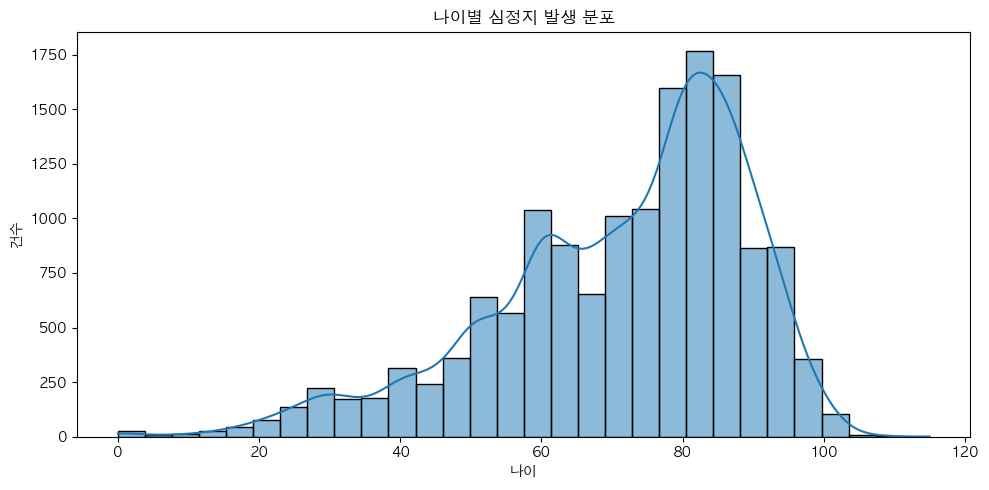

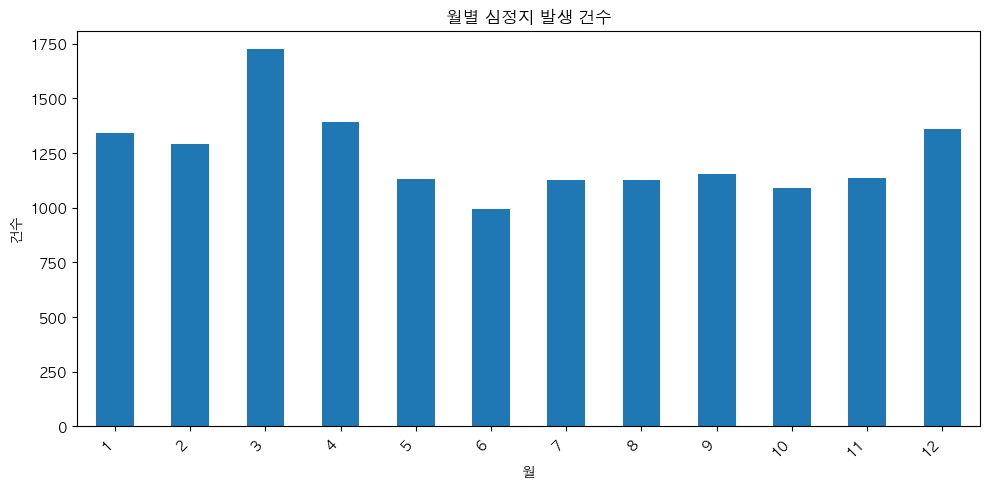

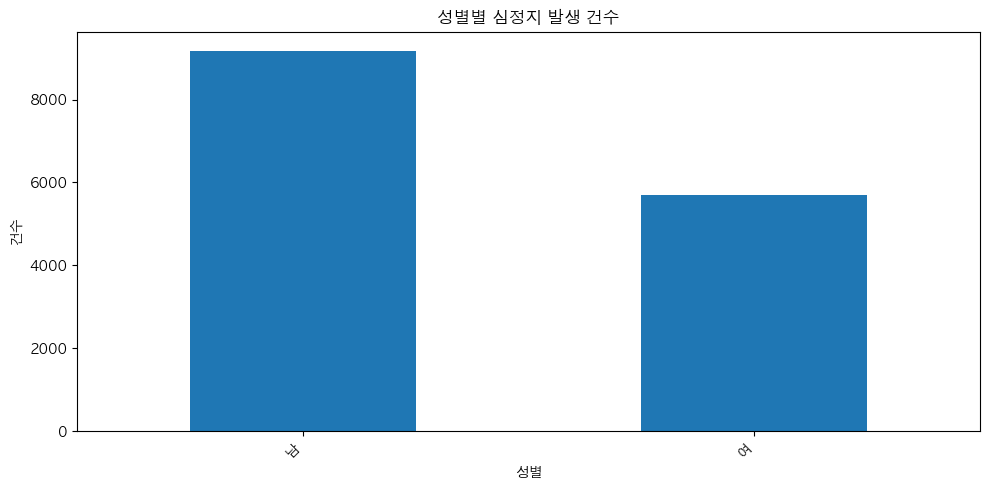

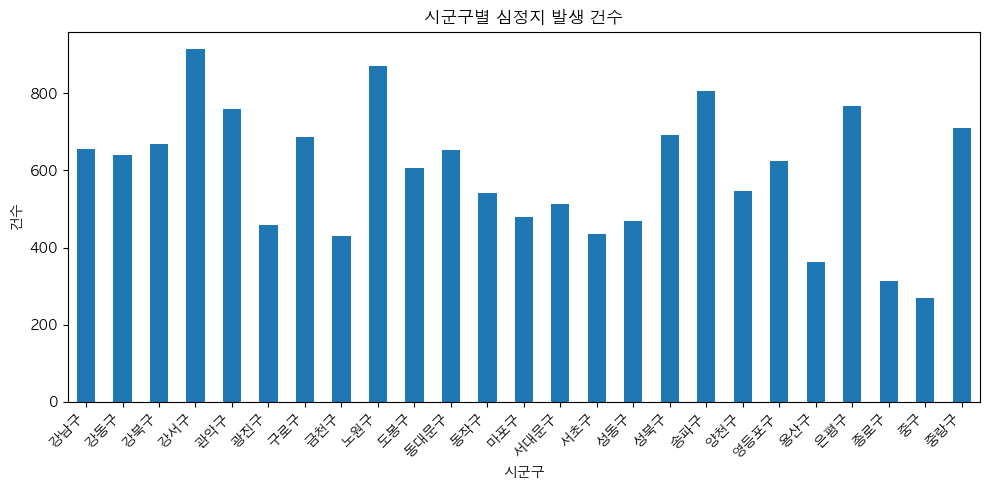

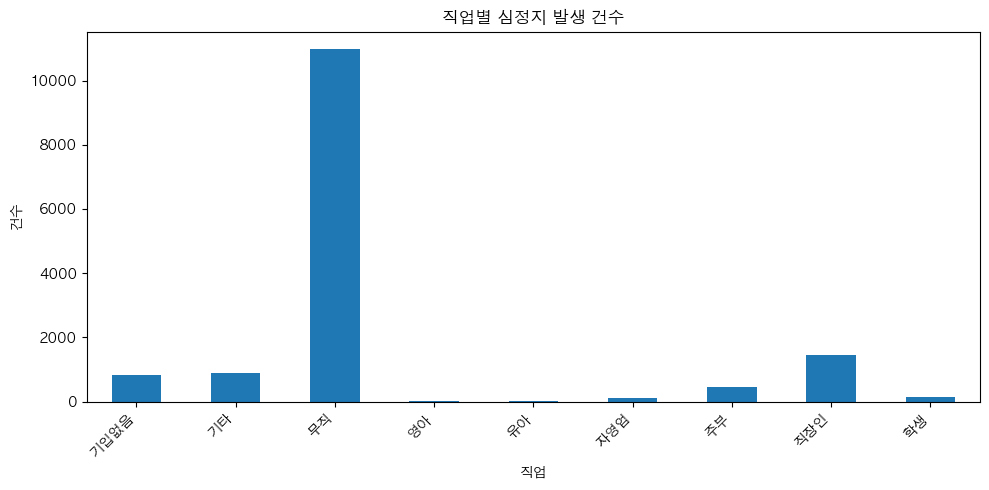

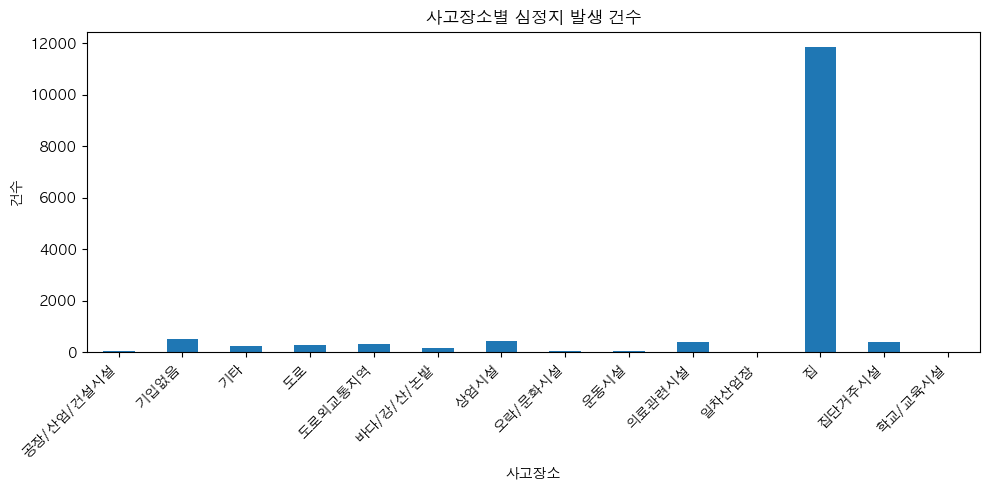

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Mac용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# '심정지' 행만 필터링
target_df = df[df['심정지'] == '심정지']

# 1. 나이: 히스토그램 + KDE (곡선)
plt.figure(figsize=(10, 5))
sns.histplot(target_df['나이'], kde=True, bins=30)
plt.title('나이별 심정지 발생 분포')
plt.xlabel('나이')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

# 2. 나머지 범주형 변수들: 막대 그래프
columns_to_plot = ['월', '성별', '시군구', '직업', '사고장소']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    target_df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{col}별 심정지 발생 건수')
    plt.xlabel(col)
    plt.ylabel('건수')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [27]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 사고장소가 '집'인 경우의 수
집_건수 = (target_df['사고장소'] == '집').sum()

# 전체 심정지 건수
전체_심정지_건수 = len(target_df)

# 비율 계산
퍼센트 = (집_건수 / 전체_심정지_건수) * 100

# 결과 출력
print(f"심정지 중 사고장소가 '집'인 경우의 비율: {퍼센트:.2f}%")


심정지 중 사고장소가 '집'인 경우의 비율: 79.73%


In [28]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 직업이 '무직'인 경우의 수
무직_건수 = (target_df['직업'] == '무직').sum()

# 전체 심정지 건수
전체_심정지_건수 = len(target_df)

# 비율 계산
퍼센트 = (무직_건수 / 전체_심정지_건수) * 100

# 결과 출력
print(f"심정지 중 직업이 '무직'인 경우의 비율: {퍼센트:.2f}%")


심정지 중 직업이 '무직'인 경우의 비율: 73.81%


In [29]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 시군구별 비율 계산
시군구_비율 = (target_df['시군구'].value_counts(normalize=True) * 100).round(2)

# 결과 출력 (내림차순)
print(시군구_비율)


시군구
강서구     6.15
노원구     5.86
송파구     5.42
은평구     5.16
관악구     5.11
중랑구     4.77
성북구     4.65
구로구     4.61
강북구     4.49
강남구     4.42
동대문구    4.38
강동구     4.31
영등포구     4.2
도봉구     4.08
양천구     3.67
동작구     3.64
서대문구    3.46
마포구     3.23
성동구     3.15
광진구     3.09
서초구     2.92
금천구     2.88
용산구     2.43
종로구     2.11
중구       1.8
Name: proportion, dtype: Float64


In [30]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 성별별 비율 계산
성별_비율 = (target_df['성별'].value_counts(normalize=True) * 100).round(2)

# 결과 출력
print(성별_비율)


성별
남    61.75
여    38.25
Name: proportion, dtype: Float64


In [31]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 월별 비율 계산
월별_비율 = (target_df['월'].value_counts(normalize=True) * 100).round(2)

# 결과 출력
print(월별_비율)


월
3     11.59
4      9.37
12     9.16
1      9.02
2      8.69
9      7.77
11     7.64
5      7.60
7      7.58
8      7.58
10     7.31
6      6.68
Name: proportion, dtype: float64


In [32]:
# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 나이별 비율 계산
나이_비율 = (target_df['나이'].value_counts(normalize=True) * 100).round(2)

# 상위 10개만 출력
상위10_나이 = 나이_비율.head(10)

# 결과 출력
print(상위10_나이)


나이
80    3.38
60    3.19
83    3.04
79    3.00
81    2.96
82    2.94
84    2.94
86    2.90
85    2.89
87    2.80
Name: proportion, dtype: float64


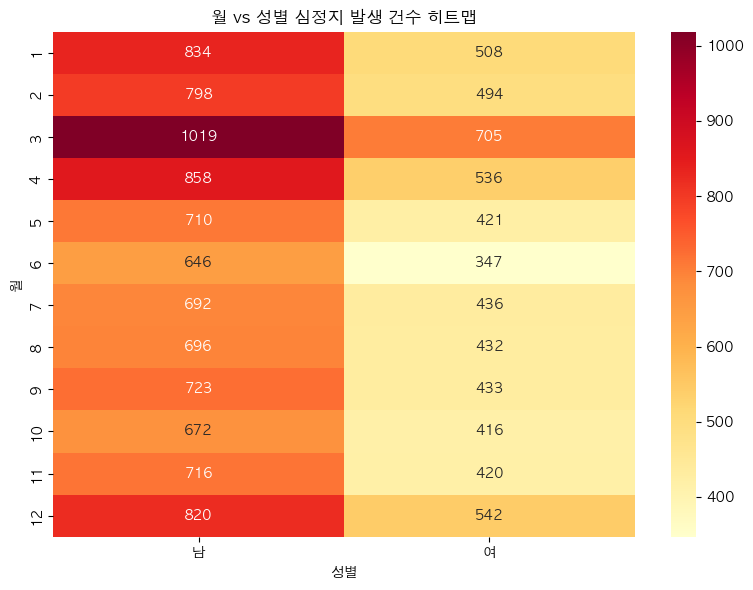

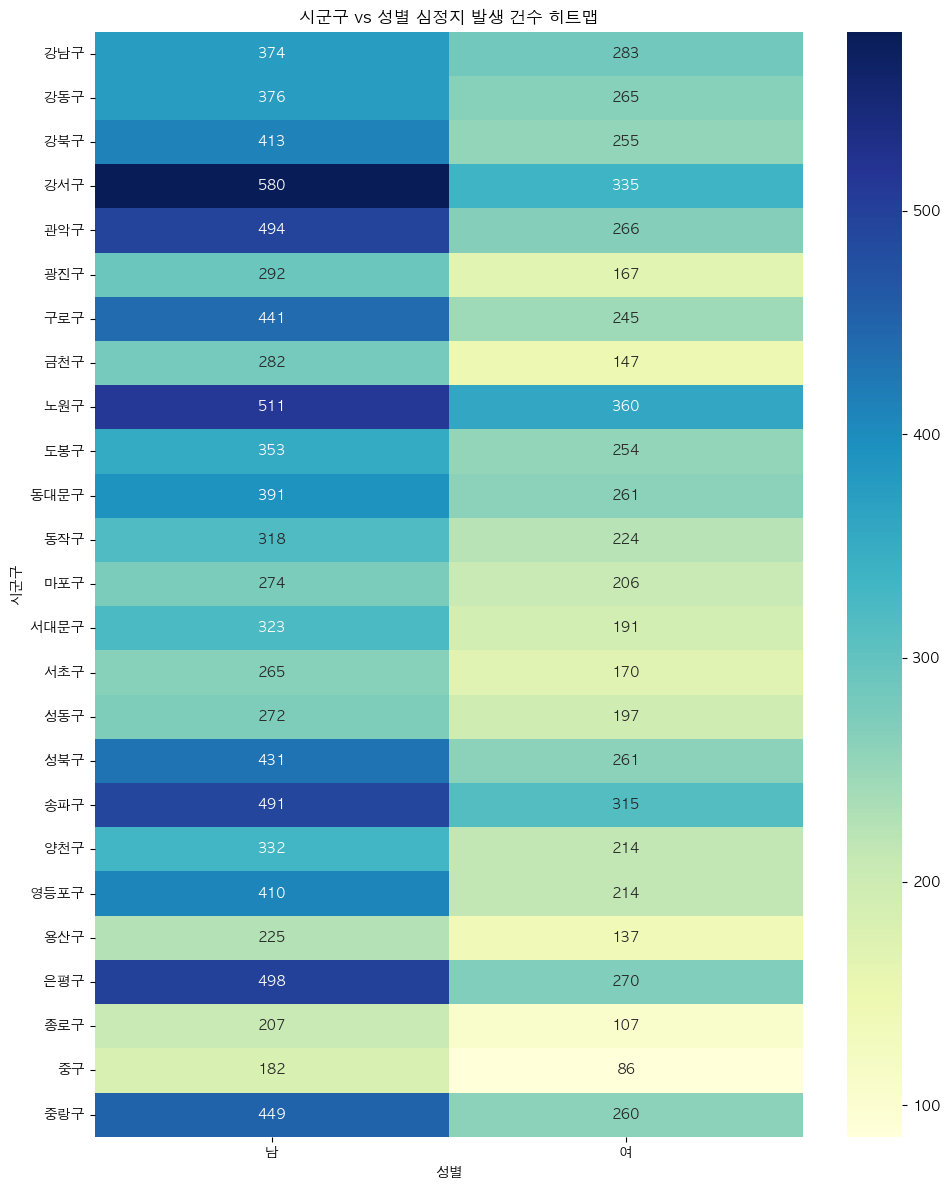

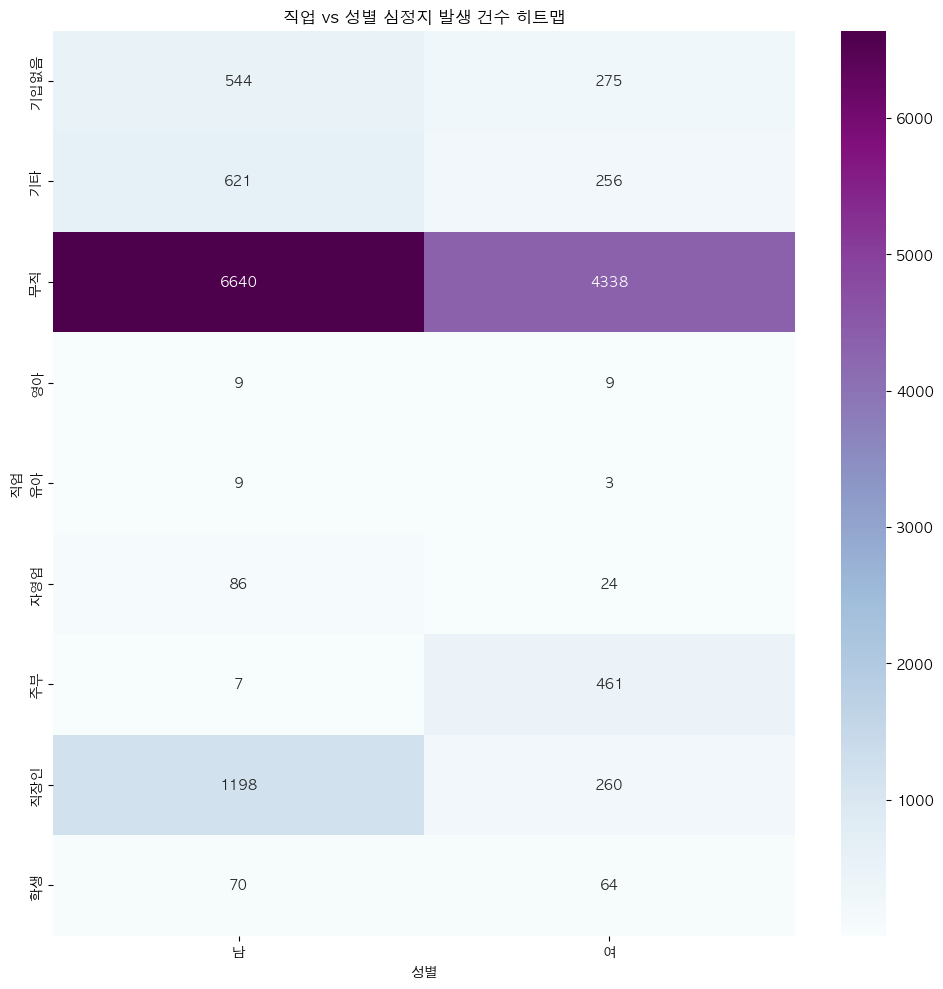

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Mac용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 심정지인 데이터만 필터링
target_df = df[df['심정지'] == '심정지']

# 1. 월 vs 성별
pivot1 = target_df.pivot_table(index='월', columns='성별', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot1, annot=True, fmt='d', cmap='YlOrRd')
plt.title('월 vs 성별 심정지 발생 건수 히트맵')
plt.ylabel('월')
plt.xlabel('성별')
plt.tight_layout()
plt.show()

# 2. 시군구 vs 성별
pivot2 = target_df.pivot_table(index='시군구', columns='성별', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 12))
sns.heatmap(pivot2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('시군구 vs 성별 심정지 발생 건수 히트맵')
plt.ylabel('시군구')
plt.xlabel('성별')
plt.tight_layout()
plt.show()

# 3. 직업 vs 성별
pivot3 = target_df.pivot_table(index='직업', columns='성별', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 10))
sns.heatmap(pivot3, annot=True, fmt='d', cmap='BuPu')
plt.title('직업 vs 성별 심정지 발생 건수 히트맵')
plt.ylabel('직업')
plt.xlabel('성별')
plt.tight_layout()
plt.show()


In [35]:
# 나이대 구간화 (경고 해결 버전)
bins = list(range(0, 101, 10))  # 0, 10, ..., 100
labels = [f"{i}대" for i in bins[:-1]]

target_df.loc[:, '나이대'] = pd.cut(target_df['나이'], bins=bins, labels=labels, right=False)


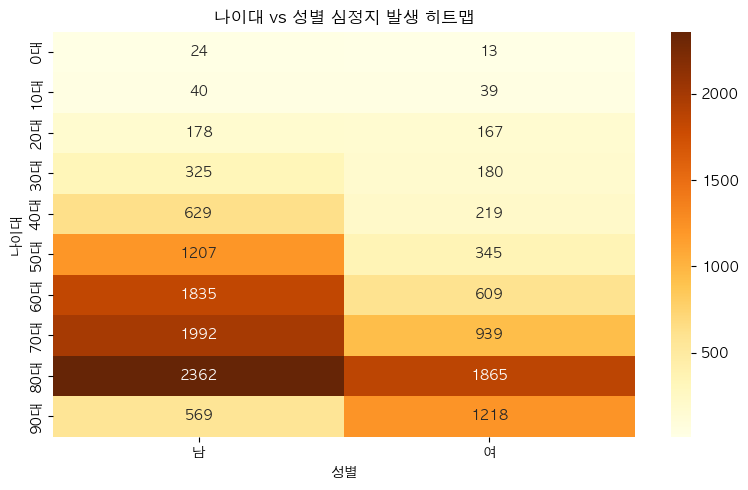

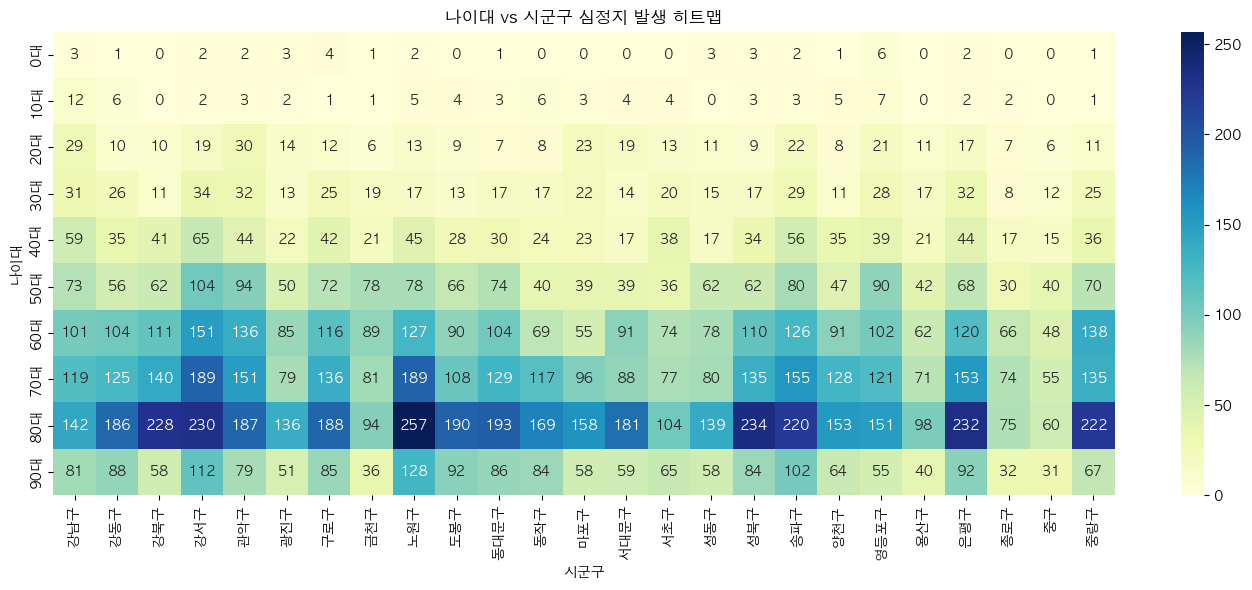

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Mac용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 나이대 vs 성별
pivot_age_gender = target_df.pivot_table(index='나이대', columns='성별', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_age_gender, annot=True, fmt='d', cmap='YlOrBr')
plt.title('나이대 vs 성별 심정지 발생 히트맵')
plt.xlabel('성별')
plt.ylabel('나이대')
plt.tight_layout()
plt.show()

# 2. 나이대 vs 시군구
pivot_age_region = target_df.pivot_table(index='나이대', columns='시군구', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_age_region, annot=True, fmt='d', cmap='YlGnBu')
plt.title('나이대 vs 시군구 심정지 발생 히트맵')
plt.xlabel('시군구')
plt.ylabel('나이대')
plt.tight_layout()
plt.show()
